<a href="https://colab.research.google.com/github/sbfrusho/Deep-Learning-/blob/main/Digit_classifier_Dense_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd


In [ ]:
(trainX , trainY) , (testX , testY) = keras.datasets.mnist.load_data()


In [ ]:
len(trainX) #size of train dataset for x = 60000

60000

In [ ]:
len(testX) #size of test dataset for x = 10000

10000

In [ ]:
trainX[0].shape #prints the sample size 2x8x28

(28, 28)

In [ ]:
    print(trainX[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
for i in range (10):
    print(trainY[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
trainX.shape

(60000, 28, 28)

In [ ]:
trainX = trainX/255
testX = testX/255

In [ ]:
trainX_flatten = trainX.reshape(len(trainX) , 28*28)
trainX_flatten.shape


(60000, 784)

In [ ]:
testX_flatten = testX.reshape(len(testX) , 28*28)
testX_flatten.shape

(10000, 784)

In [ ]:
trainX_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10 , input_shape = (784,) , activation = 'sigmoid')
])

model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(trainX_flatten , trainY , epochs = 5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8194 - loss: 0.7050
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9144 - loss: 0.3078
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9210 - loss: 0.2779
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9226 - loss: 0.2740
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9287 - loss: 0.2605


Test Dataset

In [ ]:
model.evaluate(testX_flatten , testY)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9136 - loss: 0.3044


[0.2686256468296051, 0.925599992275238]

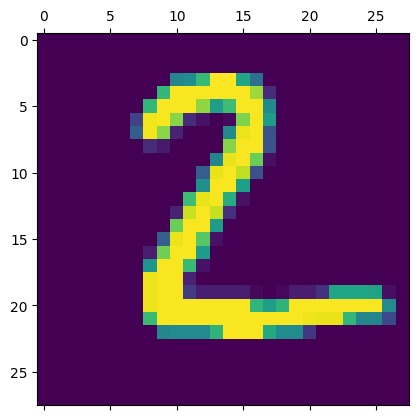

In [ ]:
plt.matshow(testX[1])

In [ ]:
y_predicted = model.predict(testX_flatten)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([4.5935571e-01, 5.3891791e-03, 9.9929619e-01, 4.2917445e-01,
       3.9413212e-10, 8.3502829e-01, 8.9926505e-01, 6.7477258e-13,
       1.9557360e-01, 2.9516949e-09], dtype=float32)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
model.predict(testX_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[2.4989272e-02, 2.5157456e-07, 6.3772492e-02, ..., 9.9975342e-01,
        1.1182854e-01, 6.3689345e-01],
       [4.5935571e-01, 5.3891791e-03, 9.9929619e-01, ..., 6.7477258e-13,
        1.9557360e-01, 2.9516949e-09],
       [4.6545945e-04, 9.9279457e-01, 6.7489266e-01, ..., 1.3650304e-01,
        3.9385501e-01, 4.9772423e-02],
       ...,
       [5.6336989e-06, 2.7747089e-06, 1.2927195e-03, ..., 2.4177437e-01,
        5.7013267e-01, 7.8179938e-01],
       [1.1000750e-04, 1.7994853e-04, 1.3725998e-04, ..., 5.2098476e-05,
        6.9412273e-01, 1.0576669e-04],
       [9.6634012e-03, 2.7636826e-10, 1.7068757e-01, ..., 1.1707963e-08,
        6.3097826e-04, 8.6217136e-07]], dtype=float32)

In [ ]:
confusion_matric = tf.math.confusion_matrix(testY , y_predicted_labels)
confusion_matric

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   7,    9,  923,   17,    6,    2,   13,    9,   41,    5],
       [   3,    0,   17,  925,    1,   21,    3,   11,   22,    7],
       [   1,    1,    4,    1,  912,    0,   13,    4,   12,   34],
       [  10,    3,    3,   36,   10,  757,   20,    8,   37,    8],
       [  11,    3,    7,    1,    7,    7,  917,    2,    3,    0],
       [   1,    5,   26,    7,    5,    0,    0,  951,    4,   29],
       [   5,    6,    6,   23,    9,   20,    9,   12,  878,    6],
       [  11,    7,    1,    9,   25,    6,    0,   21,    6,  923]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

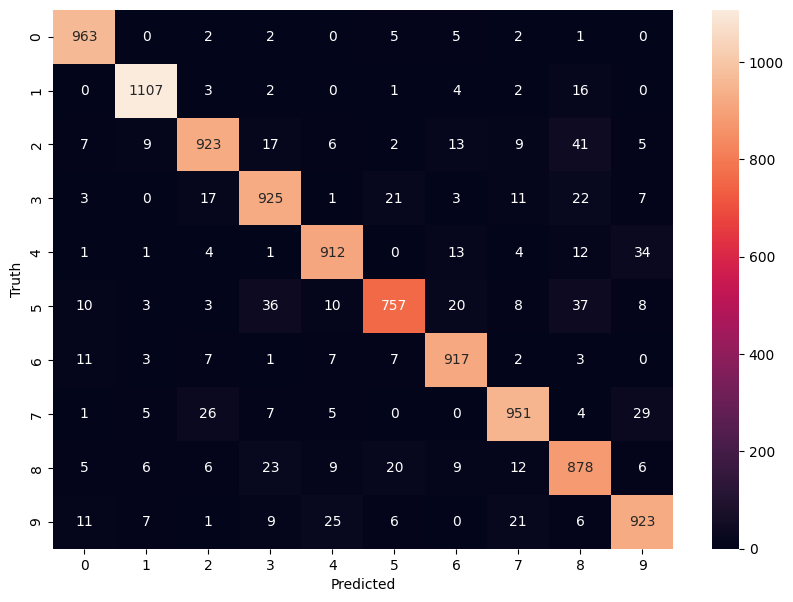

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matric , annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100 , input_shape = (784,) , activation = 'relu'),
    keras.layers.Dense(10 , activation = 'sigmoid')
])

model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

model.fit(trainX_flatten , trainY , epochs = 5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8724 - loss: 0.4505
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9595 - loss: 0.1392
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9719 - loss: 0.0913
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9798 - loss: 0.0661
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9846 - loss: 0.0517


In [ ]:
model.evaluate(testX_flatten , testY)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9740 - loss: 0.0952


[0.08684055507183075, 0.9745000004768372]

In [ ]:
confusion_matrics = tf.math.confusion_matrix(testY , y_predicted_labels)
confusion_matrics

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   7,    9,  923,   17,    6,    2,   13,    9,   41,    5],
       [   3,    0,   17,  925,    1,   21,    3,   11,   22,    7],
       [   1,    1,    4,    1,  912,    0,   13,    4,   12,   34],
       [  10,    3,    3,   36,   10,  757,   20,    8,   37,    8],
       [  11,    3,    7,    1,    7,    7,  917,    2,    3,    0],
       [   1,    5,   26,    7,    5,    0,    0,  951,    4,   29],
       [   5,    6,    6,   23,    9,   20,    9,   12,  878,    6],
       [  11,    7,    1,    9,   25,    6,    0,   21,    6,  923]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

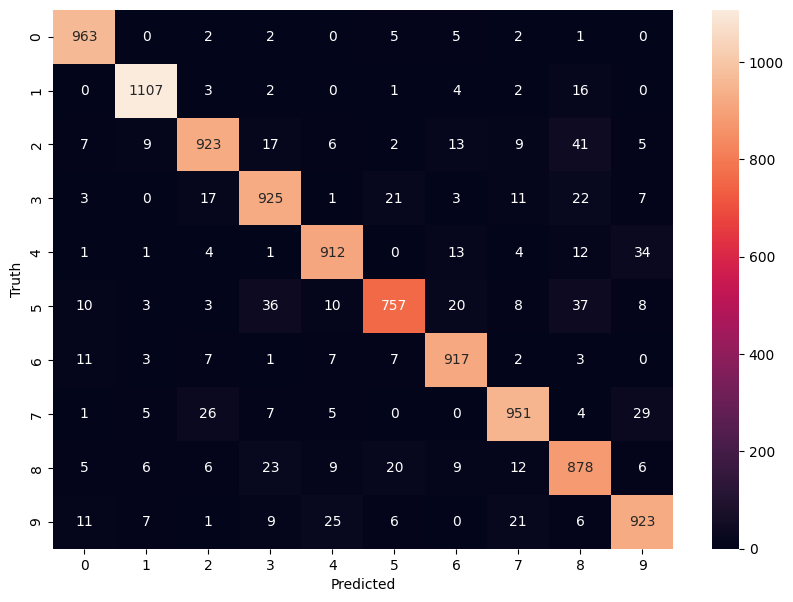

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrics , annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100 , input_shape = (784,) , activation = 'relu'),
    keras.layers.Dense(10 , activation = 'sigmoid')
])

model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

model.fit(trainX , trainY , epochs = 5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8757 - loss: 0.4490
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9612 - loss: 0.1319
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9731 - loss: 0.0895
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9795 - loss: 0.0651
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9838 - loss: 0.0545


Text(95.72222222222221, 0.5, 'Truth')

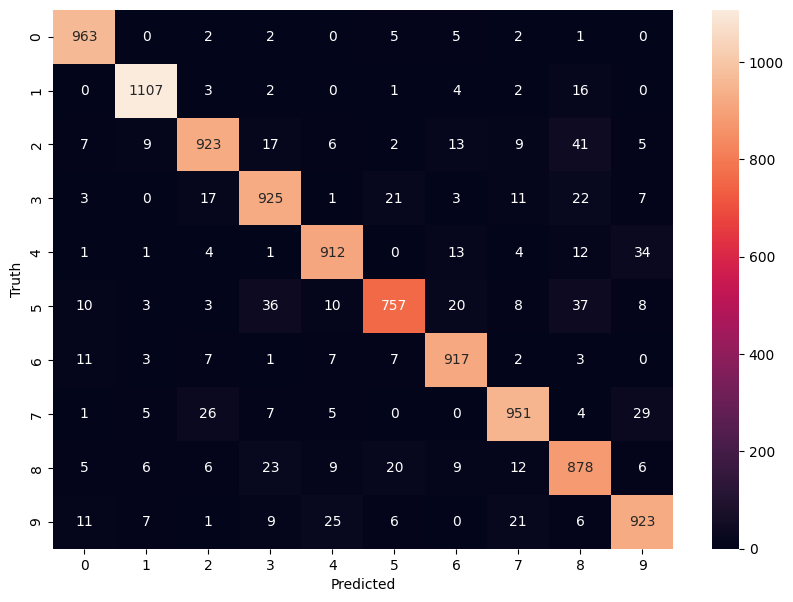

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrics , annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Evaluate model performance
model.evaluate(testX, testY)

# Predict Y values
predictY = model.predict(testX)

print('OriginalY   PredictedY')
print('=========   ==========')
for i in range(100):
  print((testY[i]), '\t\t', np.argmax(predictY[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9703 - loss: 0.0990
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
OriginalY   PredictedY
=========   ==========
7 		 7
2 		 2
1 		 1
0 		 0
4 		 4
1 		 1
4 		 4
9 		 9
5 		 5
9 		 9
0 		 0
6 		 6
9 		 9
0 		 0
1 		 1
5 		 5
9 		 9
7 		 7
3 		 3
4 		 4
9 		 9
6 		 6
6 		 6
5 		 5
4 		 4
0 		 0
7 		 7
4 		 4
0 		 0
1 		 1
3 		 3
1 		 1
3 		 3
4 		 4
7 		 7
2 		 2
7 		 7
1 		 1
2 		 2
1 		 1
1 		 1
7 		 7
4 		 4
2 		 2
3 		 3
5 		 5
1 		 1
2 		 2
4 		 4
4 		 4
6 		 6
3 		 3
5 		 5
5 		 5
6 		 6
0 		 0
4 		 4
1 		 1
9 		 9
5 		 5
7 		 7
8 		 8
9 		 9
3 		 3
7 		 7
4 		 4
6 		 6
4 		 4
3 		 3
0 		 0
7 		 7
0 		 0
2 		 2
9 		 9
1 		 1
7 		 7
3 		 3
2 		 2
9 		 9
7 		 7
7 		 7
6 		 6
2 		 2
7 		 7
8 		 8
4 		 4
7 		 7
3 		 3
6 		 6
1 		 1
3 		 3
6 		 6
9 		 9
3 		 3
1 		 1
4 		 4
1 		 1
7 		 7
6 		 6
9 		 9


In [ ]:
for i in range (10):
  print(testY[i])

7
2
1
0
4
1
4
9
5
9
